<a href="https://colab.research.google.com/github/jorgeanais/adp/blob/master/Covid19_Chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Covid19 data from MinCiencia Chile

Data extracted from http://www.minciencia.gob.cl/COVID19 
Author: Jorge Anais
Last update: 13 Apr 2021

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
# Data preprocessing
data_source = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv'
df = pd.read_csv(data_source, header=None).transpose()
df.columns = df.iloc[0]
df.drop(df.index[0], inplace=True)
df['Fecha'] = pd.to_datetime(df["Fecha"], format='%Y-%m-%d')
df.set_index('Fecha', inplace=True)

# data type to numeric instead of object
for c in df.columns:
  df[c] = pd.to_numeric(df[c])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 601 entries, 2020-03-02 to 2021-10-23
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Casos nuevos con sintomas              601 non-null    float64
 1   Casos totales                          601 non-null    float64
 2   Casos recuperados                      92 non-null     float64
 3   Fallecidos                             601 non-null    float64
 4   Casos activos                          582 non-null    float64
 5   Casos nuevos sin sintomas              543 non-null    float64
 6   Casos nuevos totales                   601 non-null    float64
 7   Casos activos por FD                   601 non-null    float64
 8   Casos activos por FIS                  490 non-null    float64
 9   Casos recuperados por FIS              490 non-null    float64
 10  Casos recuperados por FD               601 non-null    

In [ ]:
df['Media movil semanal Casos nuevos totales'] = df['Casos nuevos totales'].rolling(window=7, center=True).mean()

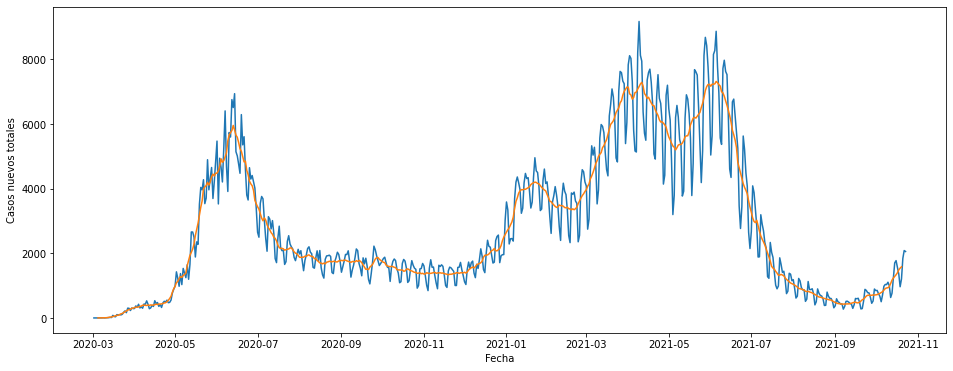

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x=df.index, y='Casos nuevos totales')
sns.lineplot(data=df, x=df.index, y='Media movil semanal Casos nuevos totales')